# Условие

Дан упорядоченный по $x$ набор координат - это вершины гор. Надо соединить все последовательно, а еще каждую вершину с ближайшей следующей, не меньшей по высоте.

# Решение

Суммировать последовательное соединение вершин несложно. А для соединения вершины с ближайшей следующей, будем хранить в стеке координаты вершин, которые еще не соединенины с большей.
<br>
В стеке они точно будут храниться в порядке убывания, так как если вдруг какая-то вершина, большая, чем имеющаяся в деке найдена, значит с ней меньшую из дека и нужно соединять, а из стека меньшую выкидывать.
<br>
Раз несоединеннные вершины сохранены в порядке убывания, на каждой итерации чтения очередной вершины будем пытаться соединить только считанную с последней из стека. Если получилось, выкидываем из стека последнюю вершину и пробуем снова с той же считанной соединить уже предпоследнюю из стека. Не забываем, что последняя из стека вершина может быть соседней с текущей считанной, а значит мы ее уже и так соединяли в качестве последовательного соединения вершин, и ее надо сразу выкидывать из стека.
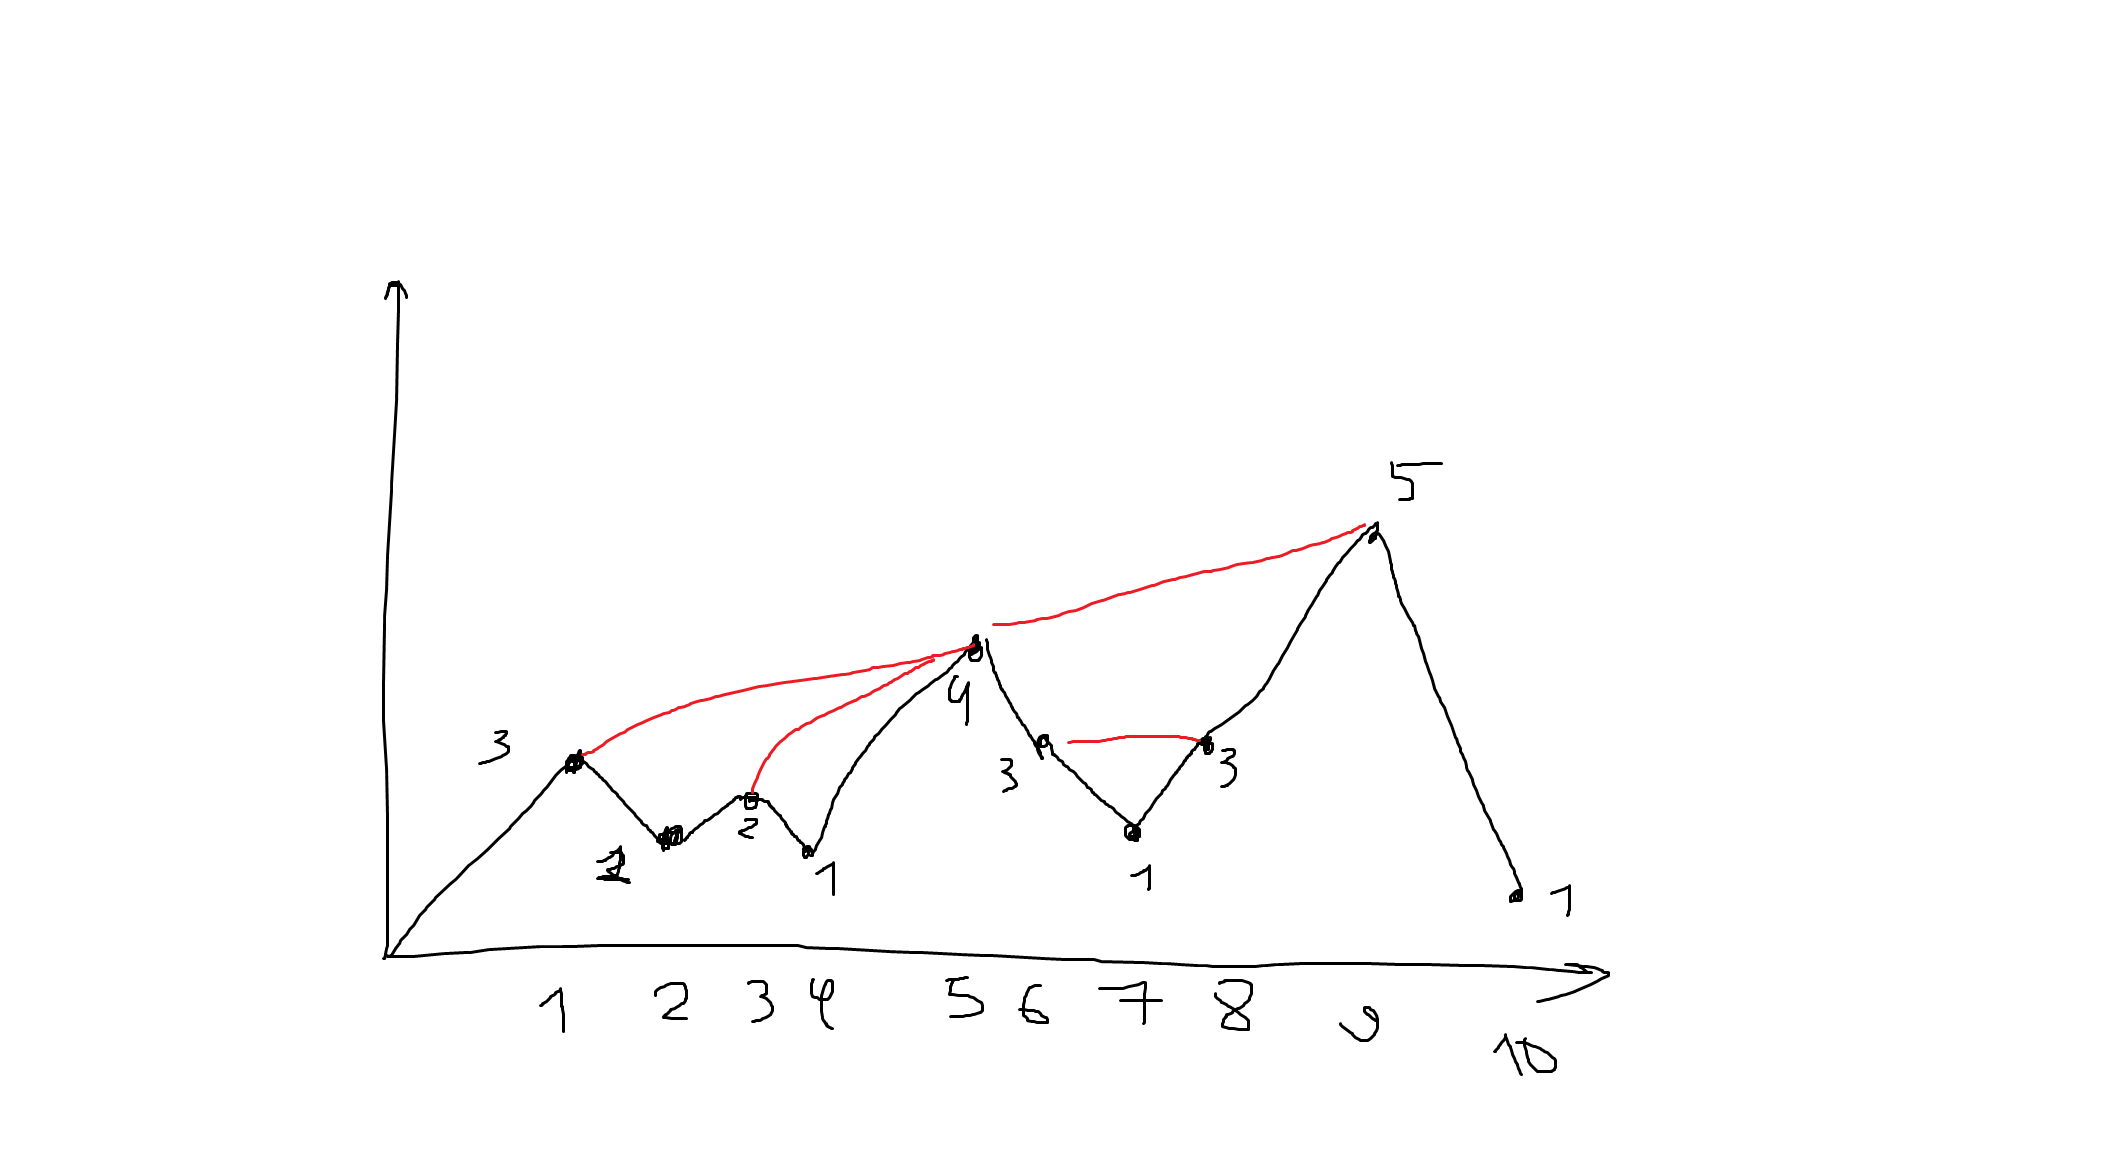

# Код

In [6]:
from collections import deque

f = open('input.txt')
n = int(f.readline())
not_connected = deque()
prev_x, prev_y = 0, 0
sum_len = 0
for i in range(n):
    x, y = [int(z) for z in f.readline().split()]
    sum_len += ((x - prev_x)**2 + (y - prev_y)**2)**0.5
    if y >= prev_y and len(not_connected) > 0:
        not_connected.pop()
    while len(not_connected) > 0 and not_connected[-1][1] <= y:
        prevh_x, prevh_y = not_connected.pop()
        sum_len += ((x - prevh_x)**2 + (y - prevh_y)**2)**0.5
    not_connected.append((x, y))
    prev_x, prev_y = x, y
print(sum_len)
f.close()

36.709211919054376
